In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [53]:
df_pr = pd.read_csv("FINAL.csv")
df_pr.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0


In [101]:
unique_region_names = set(df_pr['Region'])
years_to_predict = np.array([2023, 2024, 2025, 2026, 2027])

In [55]:
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
DTreg = DecisionTreeRegressor()
RFreg = RandomForestRegressor(n_estimators = 100, random_state = 0)
model_list = [linear,ridge,lasso]

In [56]:
data=[]

for region in unique_region_names:
    
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year']]
    y = df_pred['Estimated Population nr']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    for model in model_list:
        model.fit(X_train, y_train)
        score = cross_val_score(model, X, y,cv=5).max()
        row = [region, score,model]
        data.append(row)
pred_df1 = pd.DataFrame(data, columns = ['Region','Score','Model'])
data = []
for region in unique_region_names:
    df_3 = pred_df1.drop(pred_df1[(pred_df1["Region"] != region) ].index)
    maximum = df_3["Score"].idxmax()
    score_max = df_3.loc[maximum, 'Score']
    model = df_3.loc[maximum, 'Model']
    row = [region, score_max,model]
    data.append(row)
pred_dfe = pd.DataFrame(data, columns = ['Region','Score','Model'])

In [57]:
pred_dfe

,Region,Score,Model
0,Ireland,0.847736,LinearRegression()
1,West,0.783379,LinearRegression()
2,Mid-West,0.342634,Ridge()
3,South-West,0.796031,LinearRegression()
4,Dublin,0.828958,LinearRegression()
5,Midlands,0.764609,Ridge()
6,Mid-East,0.793335,LinearRegression()
7,Border,0.197427,Ridge()
8,South-East,0.948686,LinearRegression()


#### For Mid-West and Border will need to adjust hyperparameter for Ridge()

In [58]:
region_names = ['Mid-West','Border']

In [59]:
data = []
for region in region_names:    
    df_GS = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
    X = df_GS[['Year']]
    y = df_GS['Estimated Population nr']    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    clf = GridSearchCV(ridge, {
        'alpha': [0.1,1,10,40,50,60,70,80,90,100]
    }, cv=4, return_train_score=False)
    clf.fit(X, y)
    best_params = clf.best_params_
    best_score = clf.best_score_
    row = [region,best_params, best_score]
    data.append(row)    
    df_GSr = pd.DataFrame(data, columns = ['Region','best_params','Score'])
df_GSr

,Region,best_params,Score
0,Mid-West,{'alpha': 10},-39.024967
1,Border,{'alpha': 50},-48.729684


In [65]:
ridge10 = Ridge(alpha = 10)
ridge50 = Ridge(alpha = 50)
model_list1 = [ridge10]
model_list2 = [ridge50]

In [66]:
data=[]

for region in unique_region_names:
    region = 'Mid-West'
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year']]
    y = df_pred['Estimated Population nr']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    for model in model_list1:
        model.fit(X_train, y_train)
        score = cross_val_score(model, X, y,cv=5).max()
        row = [region, score,model]
        data.append(row)
pred_df1 = pd.DataFrame(data, columns = ['Region','Score','Model'])
data = []
for region in unique_region_names:
    region = 'Mid-West'
    df_3 = pred_df1.drop(pred_df1[(pred_df1["Region"] != region) ].index)
    maximum = df_3["Score"].idxmax()
    score_max = df_3.loc[maximum, 'Score']
    model = df_3.loc[maximum, 'Model']
    row = [region, score_max,model]
    data.append(row)
pred_df3 = pd.DataFrame(data, columns = ['Region','Score','Model'])
pred_df3.Score.mean()

0.38026967828735425

In [67]:
data=[]

for region in unique_region_names:
    region = 'Border'
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year']]
    y = df_pred['Estimated Population nr']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    for model in model_list2:
        model.fit(X_train, y_train)
        score = cross_val_score(model, X, y,cv=5).max()
        row = [region, score,model]
        data.append(row)
pred_df1 = pd.DataFrame(data, columns = ['Region','Score','Model'])
data = []
for region in unique_region_names:
    region = 'Border'
    df_3 = pred_df1.drop(pred_df1[(pred_df1["Region"] != region) ].index)
    maximum = df_3["Score"].idxmax()
    score_max = df_3.loc[maximum, 'Score']
    model = df_3.loc[maximum, 'Model']
    row = [region, score_max,model]
    data.append(row)
pred_df3 = pd.DataFrame(data, columns = ['Region','Score','Model'])
pred_df3.Score.mean()

0.4359547279800725

In [68]:
df1 = pd.DataFrame({'Region': ['South-West','Ireland','Dublin','South-East','West','Mid-East','Midlands','Mid-West','Border'],
                    'Model': ['linear', 'linear', 'linear','linear','linear','linear','ridge','ridge10','ridge50']})

In [104]:
data=[]

for region in region_linear:
    
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year']]
    y = df_pred['Estimated Population nr']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    linear.fit(X_train, y_train)
    model = df1[df1['Region'] == region]['Model'].values[0]
    for year in years_to_predict:
        p = linear.predict([[year]])
        prediction = round(p.item(),2)
        row = [year, region, prediction]
        data.append(row)

In [105]:
pred_linear = pd.DataFrame(data, columns=['Year', 'Region','Predicted Estimated Population nr'])
pred_linear

,Year,Region,Predicted Estimated Population nr
0,2023,South-West,1483545.23
1,2024,South-West,1497658.74
2,2025,South-West,1511772.24
3,2026,South-West,1525885.75
4,2027,South-West,1539999.26
5,2023,Ireland,10362125.03
6,2024,Ireland,10471194.42
7,2025,Ireland,10580263.82
8,2026,Ireland,10689333.21
9,2027,Ireland,10798402.60


In [106]:
data=[]
region = 'Midlands'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

X = df_pred[['Year']]
y = df_pred['Estimated Population nr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    p = ridge.predict([[year]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)

In [107]:
pred_ridge = pd.DataFrame(data, columns=['Year', 'Region','Predicted Estimated Population nr'])
df_final = pd.concat([pred_linear,pred_ridge],ignore_index=True)

In [108]:
data=[]
region = 'Mid-West'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

X = df_pred[['Year']]
y = df_pred['Estimated Population nr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge10.fit(X_train, y_train)
for year in years_to_predict:
    p = ridge10.predict([[year]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)

In [109]:
pred_ridge10 = pd.DataFrame(data, columns=['Year', 'Region','Predicted Estimated Population nr'])
df_final = pd.concat([df_final,pred_ridge10],ignore_index=True)

In [110]:
data=[]
region = 'Border'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

X = df_pred[['Year']]
y = df_pred['Estimated Population nr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge50.fit(X_train, y_train)
for year in years_to_predict:
    p = ridge50.predict([[year]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)

In [111]:
pred_ridge50 = pd.DataFrame(data, columns=['Year', 'Region','Predicted Estimated Population nr'])
df_final = pd.concat([df_final,pred_ridge50],ignore_index=True)

In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               45 non-null     int32  
 1   Region                             45 non-null     object 
 2   Predicted Estimated Population nr  45 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.0+ KB


In [78]:
df_pr

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0
...,...,...,...,...,...
103,2022,Mid-West,1017500.0,936100.0,92.0
104,2022,Midlands,640600.0,595758.0,93.0
105,2022,South-East,921400.0,856902.0,93.0
106,2022,South-West,1486000.0,1381980.0,93.0


In [79]:
df_e = pd.concat([df_pr,df_final],ignore_index=True)

In [113]:
df_final.to_csv("dfe.csv", index = False)

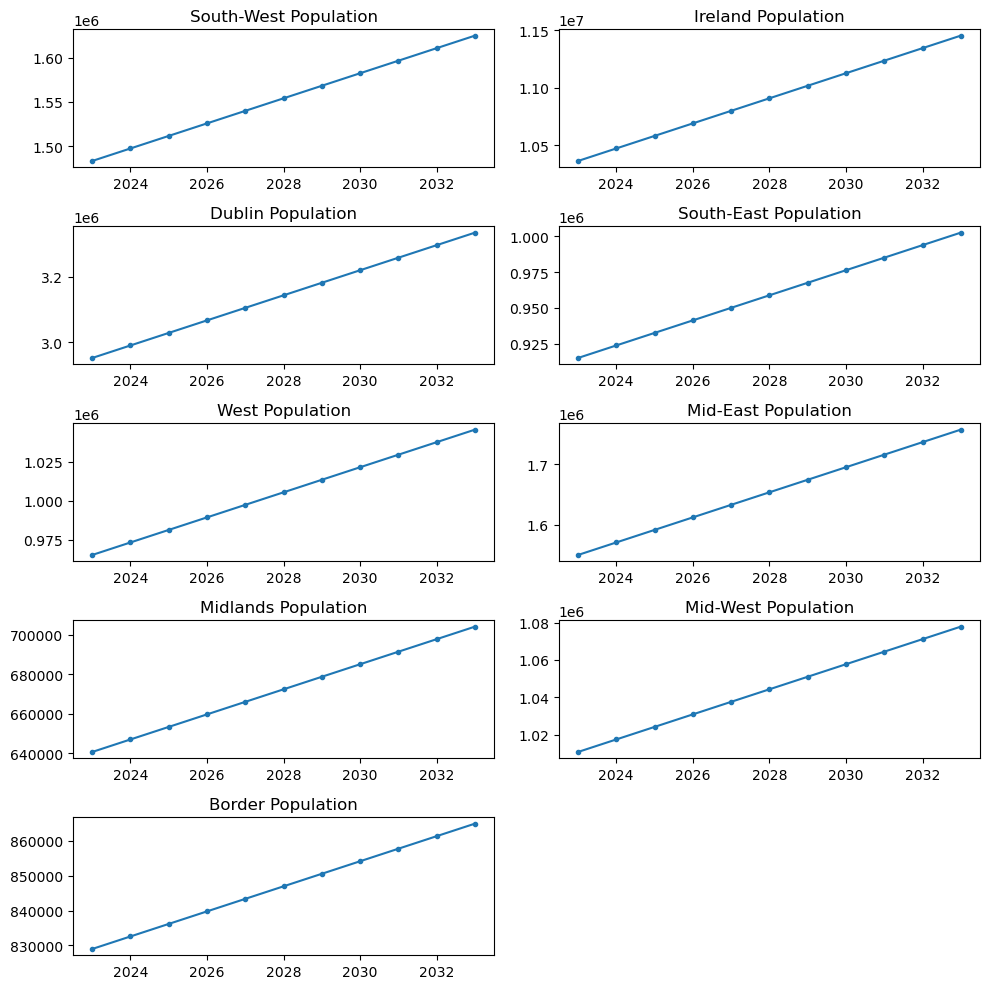

In [410]:
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(10, 10))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_final['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_final['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_final[df_final['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Estimated Population nr'],'.-', label=region)
    ax.set_title(f'{region} Population')

    # Set the Y axis scale to have readable format for numbers
#     formatter = ticker.EngFormatter()
#     ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()